<a href="https://colab.research.google.com/github/Teelfee/GT-and-ML-exploration/blob/development/ML_Basic/ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat


首先，加载数据集。这里的数据为MATLAB的格式，所以要使用SciPy.io的loadmat函数。

In [0]:
def load_data(path):
    data = loadmat(path)
    X = data['X']
    y = data['y']
    return X,y


In [10]:
X, y = load_data('ex3data1.mat')
print(np.unique(y))  # 看下有几类标签
# [ 1  2  3  4  5  6  7  8  9 10]
X.shape, y.shape
# ((5000, 400), (5000, 1))


[ 1  2  3  4  5  6  7  8  9 10]


((5000, 400), (5000, 1))

![](https://upload-images.jianshu.io/upload_images/11023262-604bde982f259637.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

In [0]:
def plot_an_image(X):
    """
    随机打印一个数字
    """
    pick_one = np.random.randint(0, 5000)
    image = X[pick_one, :]
    fig, ax = plt.subplots(figsize=(1, 1))
    ax.matshow(image.reshape((20, 20)), cmap='gray_r')
    plt.xticks([])  # 去除刻度，美观
    plt.yticks([])
    plt.show()
    print('this should be {}'.format(y[pick_one]))


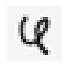

this should be [2]


In [16]:
plot_an_image(X)

In [0]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [0]:
def regularized_cost(theta, X, y, l):
    """
    don't penalize theta_0
    args:
        X: feature matrix, (m, n+1) # 插入了x0=1
        y: target vector, (m, )
        l: lambda constant for regularization
    """
    thetaReg = theta[1:]xx
    first = (-y*np.log(sigmoid(X@theta))) + (y-1)*np.log(1-sigmoid(X@theta))
    reg = (thetaReg@thetaReg)*l / (2*len(X))
    return np.mean(first) + reg


In [0]:
def regularized_gradient(theta, X, y, l):
    """
    don't penalize theta_0
    args:
        l: lambda constant
    return:
        a vector of gradient
    """
    thetaReg = theta[1:]
    first = (1 / len(X)) * X.T @ (sigmoid(X @ theta) - y)
    # 这里人为插入一维0，使得对theta_0不惩罚，方便计算
    reg = np.concatenate([np.array([0]), (l / len(X)) * thetaReg])
    return first + reg


In [0]:
from scipy.optimize import minimize

def one_vs_all(X, y, l, K):
    """generalized logistic regression
    args:
        X: feature matrix, (m, n+1) # with incercept x0=1
        y: target vector, (m, )
        l: lambda constant for regularization
        K: numbel of labels
    return: trained parameters
    """
    all_theta = np.zeros((K, X.shape[1]))  # (10, 401)
    
    for i in range(1, K+1):
        theta = np.zeros(X.shape[1])
        y_i = np.array([1 if label == i else 0 for label in y])
    
        ret = minimize(fun=regularized_cost, x0=theta, args=(X, y_i, l), method='TNC',
                        jac=regularized_gradient, options={'disp': True})
        all_theta[i-1,:] = ret.x
                         
    return all_theta


In [0]:
def predict_all(X, all_theta):
    # compute the class probability for each class on each training instance   
    h = sigmoid(X @ all_theta.T)  # 注意的这里的all_theta需要转置
    # create array of the index with the maximum probability
    # Returns the indices of the maximum values along an axis.
    h_argmax = np.argmax(h, axis=1)
    # because our array was zero-indexed we need to add one for the true label prediction
    h_argmax = h_argmax + 1
    
    return h_argmax


In [23]:
raw_X, raw_y = load_data('ex3data1.mat')
X = np.insert(raw_X, 0, 1, axis=1) # (5000, 401)
y = raw_y.flatten()  # 这里消除了一个维度，方便后面的计算 or .reshape(-1) （5000，）

all_theta = one_vs_all(X, y, 1, 10)
all_theta  # 每一行是一个分类器的一组参数


array([[-2.38138988e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.30432237e-03, -7.27456796e-10,  0.00000000e+00],
       [-3.18265577e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.45961765e-03, -5.08443072e-04,  0.00000000e+00],
       [-4.79794811e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.87427628e-05, -2.47807166e-07,  0.00000000e+00],
       ...,
       [-7.98524534e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -8.95414775e-05,  7.22697404e-06,  0.00000000e+00],
       [-4.57165011e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.33440138e-03,  9.98358371e-05,  0.00000000e+00],
       [-5.40445768e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.16516725e-04,  7.87635580e-06,  0.00000000e+00]])

In [24]:
y_pred = predict_all(X, all_theta)
accuracy = np.mean(y_pred == y)
print ('accuracy = {0}%'.format(accuracy * 100))


accuracy = 94.46%


In [27]:
def load_weight(path):
    data = loadmat(path)
    return data['Theta1'], data['Theta2']


theta1, theta2 = load_weight('ex3weights.mat')

theta1.shape, theta2.shape


((25, 401), (10, 26))

In [29]:
X, y = load_data('ex3data1.mat')
y = y.flatten()
X = np.insert(X, 0, values=np.ones(X.shape[0]), axis=1)  # intercept

X.shape, y.shape


((5000, 401), (5000,))

In [30]:
a1 = X
z2 = a1 @ theta1.T
z2.shape


(5000, 25)

In [0]:
z2 = np.insert(z2, 0, 1, axis=1)


In [32]:
a2 = sigmoid(z2)
a2.shape


(5000, 26)

In [33]:
z3 = a2 @ theta2.T
z3.shape


(5000, 10)

In [34]:
a3 = sigmoid(z3)
a3.shape


(5000, 10)

In [35]:
y_pred = np.argmax(a3, axis=1) + 1 
accuracy = np.mean(y_pred == y)
print ('accuracy = {0}%'.format(accuracy * 100))  # accuracy = 97.52%


accuracy = 97.52%
